In [1]:
x=123
x


123

In [2]:
x

123

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("coffee_shop_revenue.csv")
df.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [5]:
df.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


In [6]:
df.rename(columns={"Number_of_Customers_Per_Day":"customers", 
                   "Average_Order_Value":"aov", 
                   "Operating_Hours_Per_Day":"hours", 
                   "Number_of_Employees":"employees", 
                   "Location_Foot_Traffic":"foot_traffic", 
                   "Daily_Revenue":"revenue", 
                   
                   },inplace=True)

In [7]:
df.head()

,customers,aov,hours,employees,Marketing_Spend_Per_Day,foot_traffic,revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


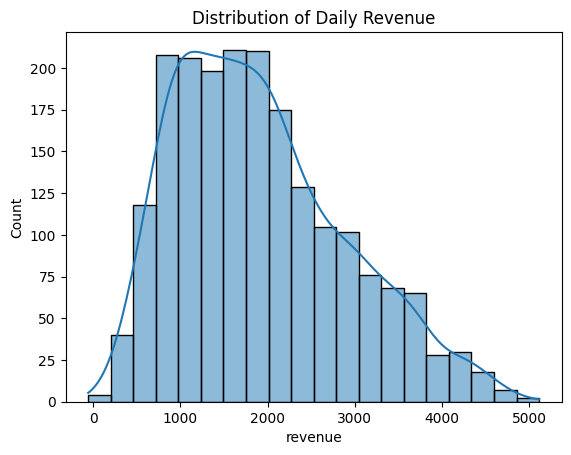

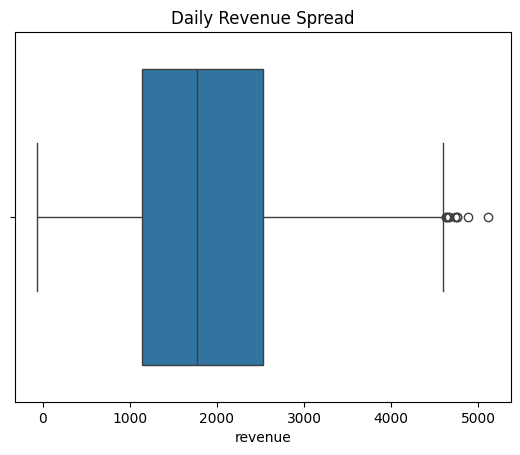

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['revenue'], kde=True, bins=20)
plt.title("Distribution of Daily Revenue")
plt.show()

sns.boxplot(x=df['revenue'])
plt.title("Daily Revenue Spread")
plt.show()


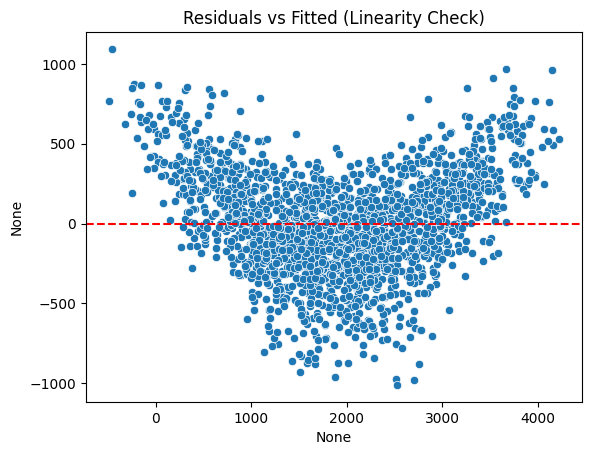

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

X = df[['customers','aov','hours','Marketing_Spend_Per_Day','foot_traffic']]  
y = df['revenue']


X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

residuals = model.resid
fitted = model.fittedvalues

sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted (Linearity Check)")
plt.show()


In [10]:
print("Durbin-Watson:", sm.stats.durbin_watson(residuals))


Durbin-Watson: 1.9862354343562678


In [11]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [12]:
bp_test = het_breuschpagan(residuals, X)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 3.6233892361345887, 'LM-Test p-value': 0.6048049592006386, 'F-Statistic': 0.723815145689172, 'F-Test p-value': 0.6055356261929639}


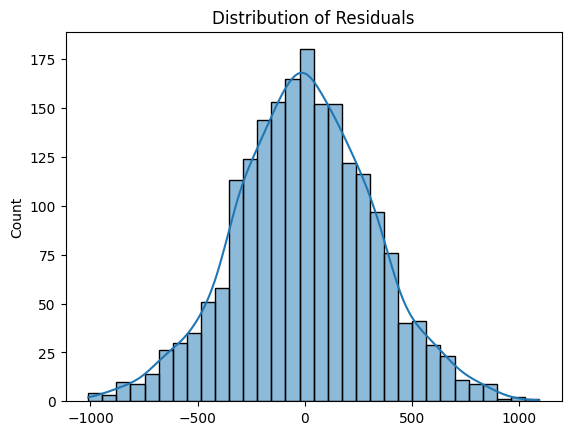

Shapiro-Wilk Test: ShapiroResult(statistic=0.9986143616681241, pvalue=0.10318791006915745)


In [13]:
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()


from scipy.stats import shapiro
print("Shapiro-Wilk Test:", shapiro(residuals))


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                   feature        VIF
0                    const  31.984484
1                customers   1.000970
2                      aov   1.001238
3                    hours   1.000902
4  Marketing_Spend_Per_Day   1.001667
5             foot_traffic   1.000721


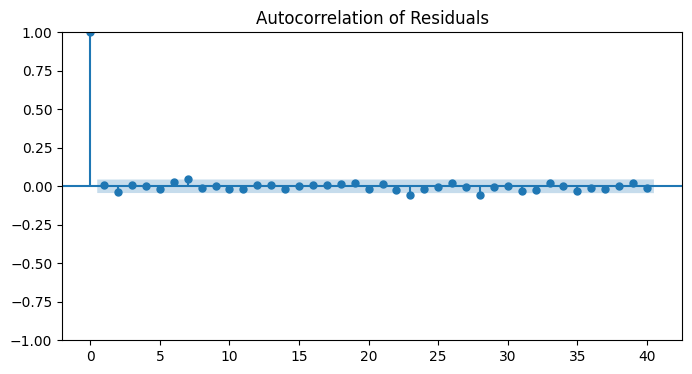

In [15]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

residuals = model.resid  

fig, ax = plt.subplots(figsize=(8,4))
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax)
plt.title("Autocorrelation of Residuals")
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df[['customers','aov','hours','Marketing_Spend_Per_Day','foot_traffic']]
y = df['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2: 0.8953812211768906
RMSE: 312.6539681298096


In [17]:
n = X_test.shape[0]   
p = X_test.shape[1]   

r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R2:", adj_r2)


Adjusted R2: 0.89405357169944


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

X = df[['customers','aov','hours','Marketing_Spend_Per_Day','foot_traffic']]
y = df['revenue']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    n, p = X_test.shape
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    return {
        "Model": name,
        "R²": round(r2, 4),
        "Adjusted R²": round(adj_r2, 4),
        "RMSE": round(rmse, 2),
        "MAPE (%)": round(mape, 2)
    }

models = [
    ("Linear Regression", LinearRegression()),
    ("Polynomial Regression (deg=2)", make_pipeline(PolynomialFeatures(degree=2), LinearRegression())),
    ("Decision Tree", DecisionTreeRegressor(max_depth=5, random_state=42)),
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("Support Vector Regression", make_pipeline(StandardScaler(), SVR(kernel='rbf'))),
    ("Neural Network (MLP)", MLPRegressor(hidden_layer_sizes=(64,32), max_iter=1000, random_state=42))
]


results = []
for name, model in models:
    results.append(evaluate_model(name, model, X_train, y_train, X_test, y_test))

results_df = pd.DataFrame(results)
print(results_df)


                           Model      R²  Adjusted R²    RMSE  MAPE (%)
0              Linear Regression  0.8954       0.8941  312.65     19.45
1  Polynomial Regression (deg=2)  0.9594       0.9589  194.73     12.26
2                  Decision Tree  0.8746       0.8730  342.31     20.28
3                  Random Forest  0.9492       0.9485  217.89     13.70
4              Gradient Boosting  0.9487       0.9481  218.89     13.65
5      Support Vector Regression  0.1365       0.1255  898.25     55.16
6           Neural Network (MLP)  0.9174       0.9163  277.87     15.65


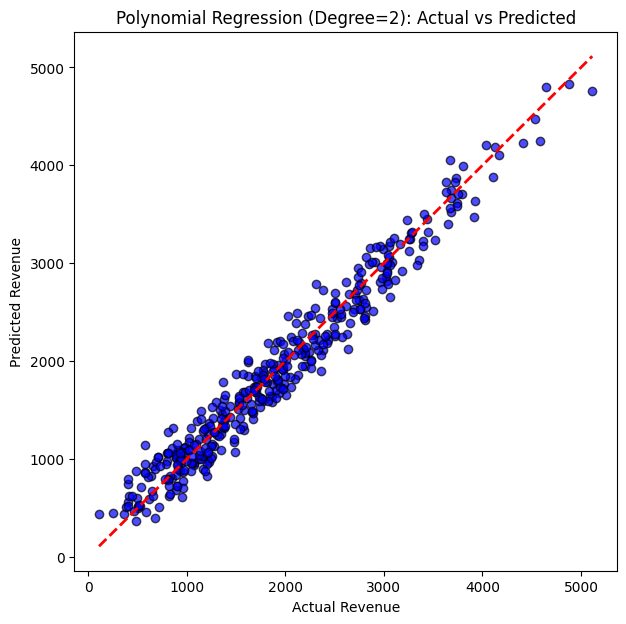

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_poly, alpha=0.7, color="blue", edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) 
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Polynomial Regression (Degree=2): Actual vs Predicted")
plt.show()


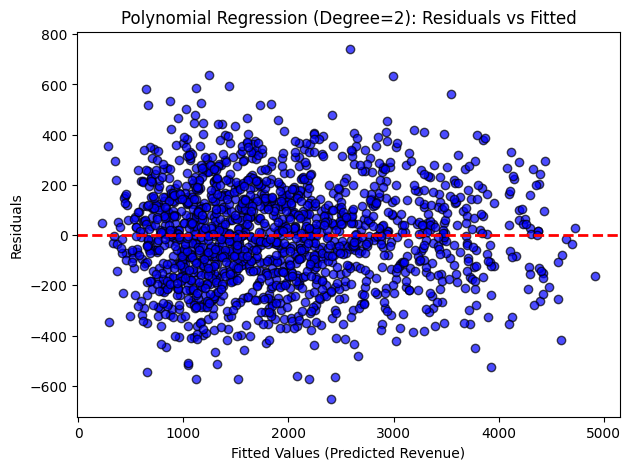

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_train)


residuals_poly = y_train - y_pred_poly

plt.figure(figsize=(7,5))
plt.scatter(y_pred_poly, residuals_poly, alpha=0.7, color="blue", edgecolor="k")
plt.axhline(0, color="red", linestyle="--", lw=2)
plt.xlabel("Fitted Values (Predicted Revenue)")
plt.ylabel("Residuals")
plt.title("Polynomial Regression (Degree=2): Residuals vs Fitted")
plt.show()


In [22]:
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R²: {adj_r2:.4f}")

Adjusted R²: 0.8941


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customers                2000 non-null   int64  
 1   aov                      2000 non-null   float64
 2   hours                    2000 non-null   int64  
 3   employees                2000 non-null   int64  
 4   Marketing_Spend_Per_Day  2000 non-null   float64
 5   foot_traffic             2000 non-null   int64  
 6   revenue                  2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB
None
         customers          aov        hours    employees  \
count  2000.000000  2000.000000  2000.000000  2000.000000   
mean    274.296000     6.261215    11.667000     7.947000   
std     129.441933     2.175832     3.438608     3.742218   
min      50.000000     2.500000     6.000000     2.000000   
25%     164.000000     4.410000     9.000000  

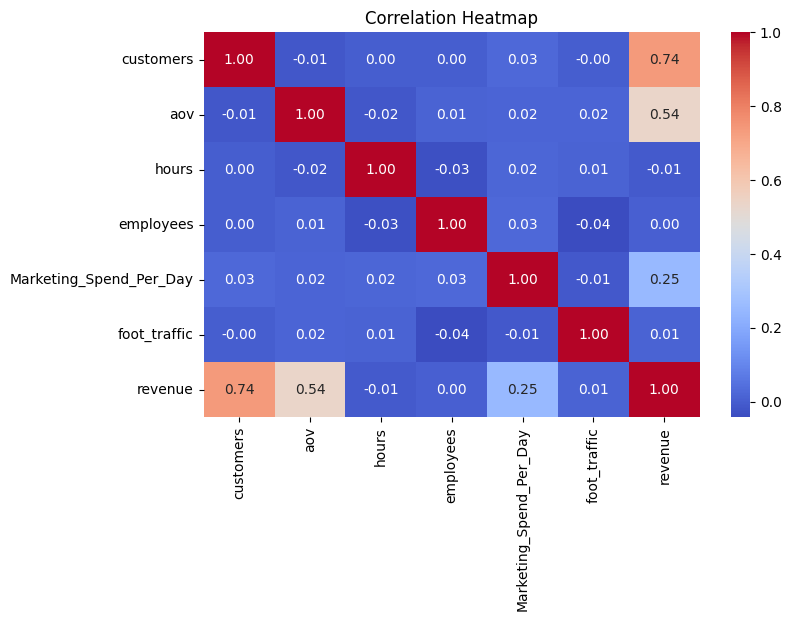


Correlation with Revenue:
revenue                    1.000000
customers                  0.736461
aov                        0.535694
Marketing_Spend_Per_Day    0.254812
foot_traffic               0.013469
employees                  0.003295
hours                     -0.005323
Name: revenue, dtype: float64


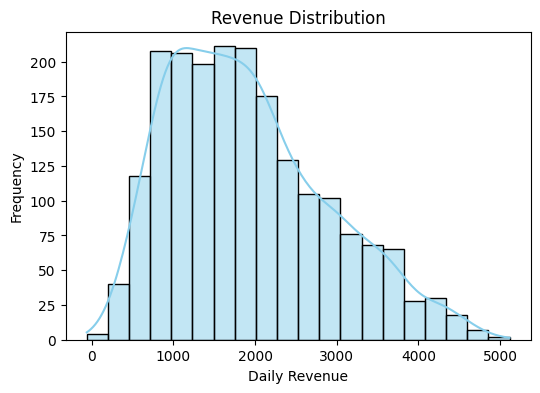

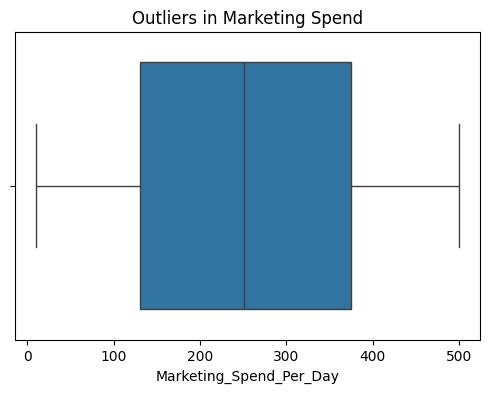

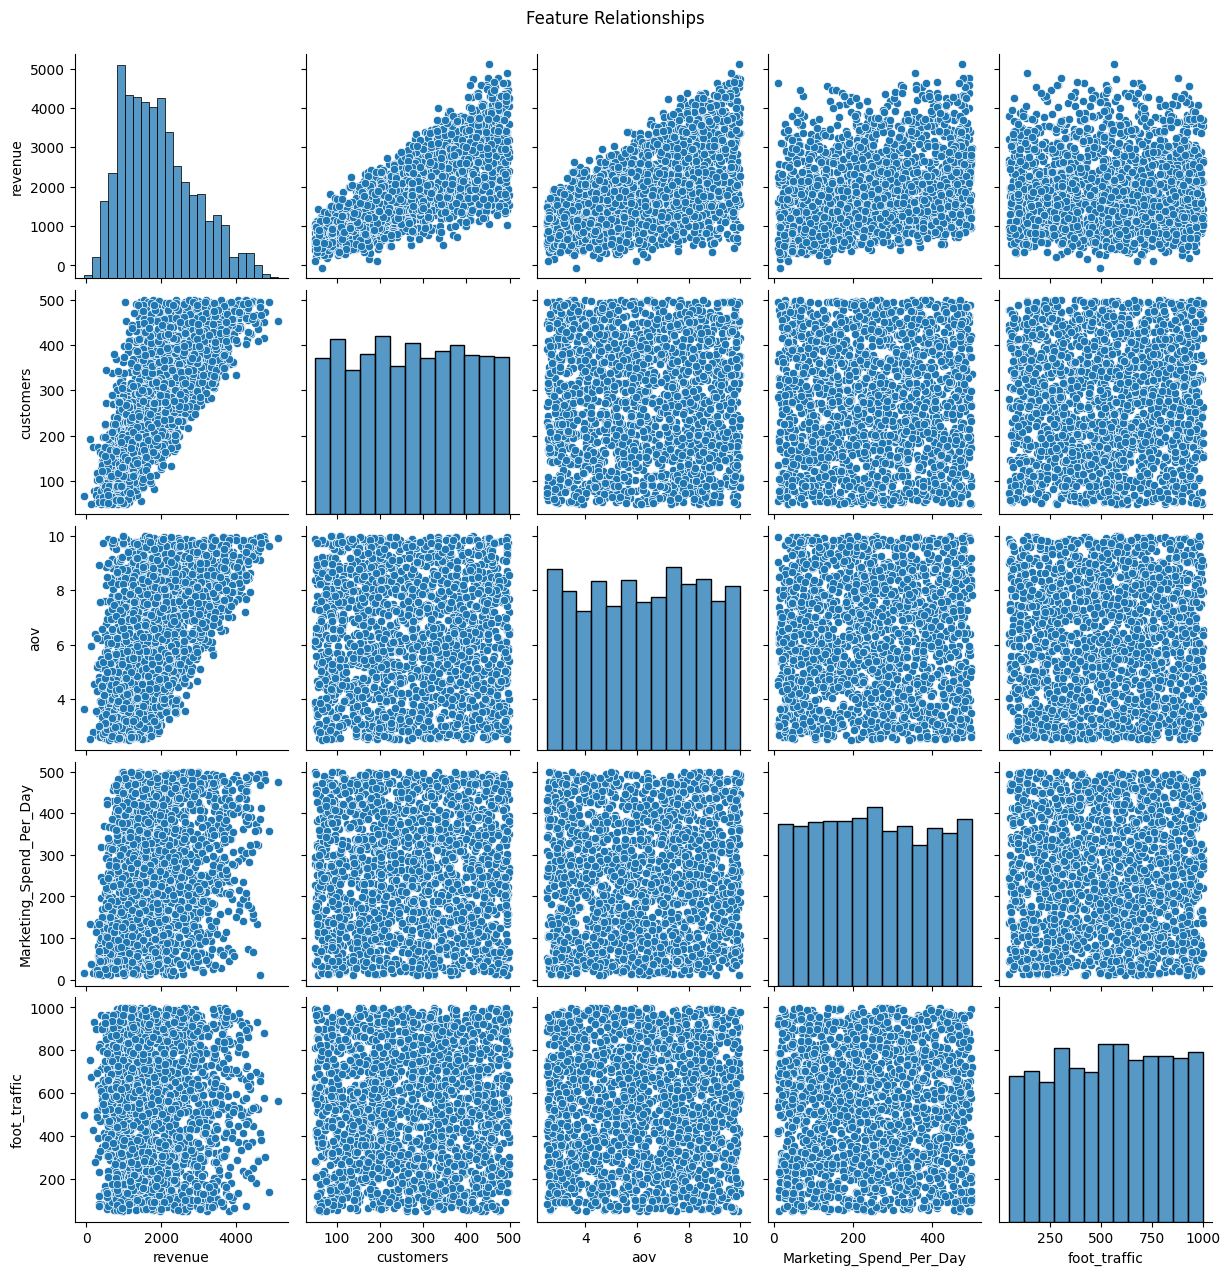

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(df.info())
print(df.describe())


plt.figure(figsize=(8,5))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

print("\nCorrelation with Revenue:")
print(corr['revenue'].sort_values(ascending=False))

plt.figure(figsize=(6,4))
sns.histplot(df['revenue'], bins=20, kde=True, color='skyblue')
plt.title("Revenue Distribution")
plt.xlabel("Daily Revenue")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Marketing_Spend_Per_Day'])
plt.title("Outliers in Marketing Spend")
plt.show()

sns.pairplot(df[['revenue','customers','aov','Marketing_Spend_Per_Day','foot_traffic']])
plt.suptitle("Feature Relationships", y=1.02)
plt.show()


if 'Location_I' in df.columns:
    plt.figure(figsize=(8,5))
    sns.barplot(x='Location_I', y='revenue', data=df, estimator='mean', palette='viridis')
    plt.title("Average Revenue by Location")
    plt.show()


In [24]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 97752.50
